In [ ]:

from sklearn.tree import DecisionTreeClassifier

# features
X = [[0, 0], [1, 1]]
# target
y = [0, 1]

clf = DecisionTreeClassifier()

clf = clf.fit(X, y)

#  decision tree classifier will predict class with lowest index
clf.predict([[2., 2.]])


In [ ]:

# probability of each class
clf.predict_proba([[2., 2.]])


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

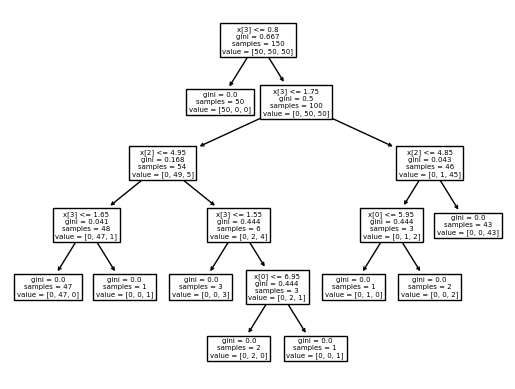

In [58]:

from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf)


In [59]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

for max_depth in [1, 2, 3, 4, 5, 6, 7]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for min_split in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(min_samples_split=min_split)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))


0.6573426573426573
0.6013986013986014
0.6013986013986014
0.7972027972027972
0.6013986013986014
0.8881118881118881
0.7552447552447552
0.7972027972027972
0.7552447552447552
0.6223776223776224
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [60]:

# use GridSearchCV to find best hyperparameters 

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7], "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': 6, 'min_samples_split': 2}
0.95


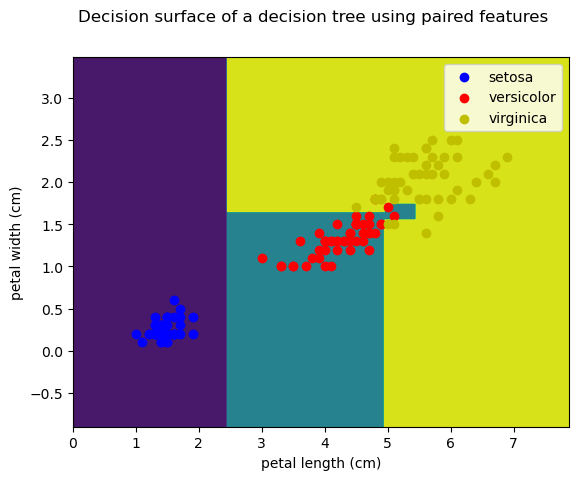

In [62]:

# Affichage de la surface de décision

import numpy as np
import matplotlib.pyplot as plt

# parameters
nb_classes = 3
plot_colors = "bry"
plot_step = 0.02

# petal length && petal witdh
pair = [2, 3]

# keep only 2 attributs
X = iris.data[:, pair]
y = iris.target

# training model
clf = tree.DecisionTreeClassifier().fit(X, y)

# display decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# display learn points
for i, color in zip(range(nb_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i])
    
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


In [ ]:

"""

* Qu'est-ce qu'un arbre de décisions ?
    - C'est un modèle d'apprentissage automatique qui utilise une structure en forme d'arbre pour représenter des décisions et leurs conséquences en fonction des données d'entrée. 
    Il est utilisé pour résoudre des problèmes de classification et de régression en identifiant des règles et des schémas à partir des données. 
    
* Expliciter sa structure :

    - Racine de l'arbre : l'algorithme sélectionne la caractéristique qui divise le mieux l'ensemble de données en sous-ensembles homogènes. 
    Cette caractéristique est choisie en fonction de critères tels que l'entropie ou le gain d'information (pour les problèmes de classification) 
    ou la réduction de la somme des carrés (pour les problèmes de régression).
    
    - Noeuds internes : Les noeuds internes de l'arbre représentent les décisions basées sur les valeurs des caractéristiques. 
    Chaque noeud interne a des branches sortantes correspondant aux différentes valeurs possibles de la caractéristique sélectionnée à ce noeud.
    
    - Feuilles : Les feuilles de l'arbre représentent les étiquettes de classe (pour les problèmes de classification) ou les valeurs de sortie (pour les problèmes de régression). 
    Chaque feuille est associée à une décision ou une prédiction.

* Décrire son principe de fonctionnement :

    - Sélection de la meilleure caractéristique
    - Division de l'ensemble de données 
    - Répétition récursive des étapes de sélection et division
    - Attribution des étiquettes aux feuilles
    
* Décrire brièvement la notion d'impureté et son intérêt :

    - C'est une mesure de la désorganisation ou de la mixité des classes dans un ensemble de données (ex : entropie, gain d'information, indice de Gini).
    L'objectif d'un arbre de décision est de minimiser cette impureté lors de la sélection des caractéristiques pour diviser l'ensemble de données.

    - L'intérêt de minimiser l'impureté est d'aboutir à des divisions qui créent des sous-ensembles plus homogènes. 
    Cela permet à l'arbre de prendre des décisions plus précises lors de la prédiction sur de nouvelles données. 

* Décrire brièvement l'algorithme CART : 

    - Signification acronyme : Classification And Regression Trees. Développé par Leo Breiman, CART peut être utilisé pour des tâches de classification et de régression.
    L'algorithme CART utilise l'approche de division binaire à chaque nœud, ce qui signifie qu'à chaque étape, l'ensemble de données est divisé en deux sous-ensembles. 
    Cette approche binaire facilite la construction de l'arbre et simplifie son interprétation.
    
* En déduire comment se construit l'arbre lors de la phase d'apprentissage : 

    - De manière récursive en utilisant un processus de division binaire en suivant ces étapes : 
        - Sélection de la meilleure caractéristique
        - Division de l'ensemble de données 
        - Répétition récursive des étapes de sélection et division
        - Attribution des étiquettes aux feuilles
        
* Quels sont les avantages et les inconvénients d'un tel modèle ?
    
    - Avantages :
        - Interprétabilité : facile à comprendre et à interprétrer
        - Gestion de données hétérogènes : gestion de données qualitatives et quantitatives ou manquantes
        - Peu de prétraitement : normalisation des caractéristiques n'est pas nécessaire
    
    Inconvénients : 
        - Surajustement (overfitting) : ne généralise pas bien sur de nouvelles données
        - Stabilité : de petites variations dans les données peuvent entraîner des changements significatifs dans la structure de l'arbre
        - Biais envers les classes majoritaires : peut être biaisé envers les classes majoritaires, conduisant à des performances inférieures 
        pour les classes minoritaires dans les problèmes de classification déséquilibrés.
    
"""


     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


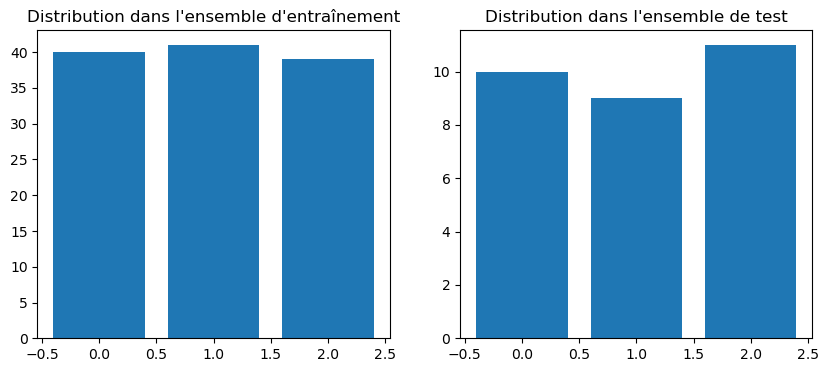

In [64]:

import pandas as pd

# Utiliser seulement les caractéristiques "petal length" et "petal width"

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target  

X = df_iris[['petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

# Afficher les données
print(X)
print(y)

# Échantillonner les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# S'assurer graphiquement de la bonne répartition des données
classes_train = y_train.value_counts()
classes_test = y_test.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(classes_train.index, classes_train.values)
axes[0].set_title('Distribution dans l\'ensemble d\'entraînement')

axes[1].bar(classes_test.index, classes_test.values)
axes[1].set_title('Distribution dans l\'ensemble de test')

plt.show()



In [66]:

"""

 * Entraîner le modèle avec max_depth=3, puis max_depth=4 jusqu'à max_depth=10
 * Pour chaque entraînement, évaluer les performances sur le jeu d'apprentissage et le jeu de test

"""

print()

for x in range(3, 11):
    estimator = DecisionTreeClassifier(max_depth=x, random_state=42)
    estimator = estimator.fit(X_train, y_train)
    print('Score with max_depth = ' + str(x))
    print('    - Train data: ', estimator.score(X_train, y_train))
    print('    - Test data: ', estimator.score(X_test, y_test))
    print()
    
"""

 * Faire une synthèse et conclure
    - Le classifieur "Decision Tree" atteint un bon score à partir dès la profondeur 3 et très bon score dès la profondeur 6 sur le dataset Iris
    
"""

print()



Score with max_depth = 3
    - Train data:  0.9583333333333334
    - Test data:  1.0

Score with max_depth = 4
    - Train data:  0.975
    - Test data:  1.0

Score with max_depth = 5
    - Train data:  0.9833333333333333
    - Test data:  1.0

Score with max_depth = 6
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 7
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 8
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 9
    - Train data:  0.9916666666666667
    - Test data:  1.0

Score with max_depth = 10
    - Train data:  0.9916666666666667
    - Test data:  1.0


